In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/tabular-playground-series-oct-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-oct-2022/train_9.csv
/kaggle/input/tabular-playground-series-oct-2022/train_3.csv
/kaggle/input/tabular-playground-series-oct-2022/train_4.csv
/kaggle/input/tabular-playground-series-oct-2022/test_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_8.csv
/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv
/kaggle/input/tabular-playground-series-oct-2022/train_5.csv
/kaggle/input/tabular-playground-series-oct-2022/train_2.csv
/kaggle/input/tabular-playground-series-oct-2022/test.csv
/kaggle/input/tabular-playground-series-oct-2022/train_0.csv
/kaggle/input/tabular-playground-series-oct-2022/train_7.csv
/kaggle/input/tabular-playground-series-oct-2022/train_1.csv
/kaggle/input/tabular-playground-series-oct-2022/train_6.csv
/kaggle/working/__notebook__.ipynb


# Exploring the dataset

In [2]:
dtypes_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_dtypes.csv')
dtypes = {k: v for (k, v) in zip(dtypes_df.column, dtypes_df.dtype)}
train0_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/train_0.csv', dtype=dtypes)
train0_df

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,1,1002,-33.313030,-0.0000,0.000000,1.854800,-0.000000,0.000000,0.000000,41.804798,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3,B,0,0
1,1,1002,-33.206146,-0.0000,0.000000,1.854800,-0.000000,0.000000,0.000000,42.261600,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3,B,0,0
2,1,1002,-33.098114,-0.0000,0.000000,1.854800,-0.000000,0.000000,0.000000,43.227001,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3,B,0,0
3,1,1002,-32.993191,-0.0000,0.000000,1.854800,-0.000000,0.000000,0.000000,43.898399,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3,B,0,0
4,1,1002,-32.887756,-0.0000,0.000000,1.854800,-0.000000,0.000000,0.000000,44.960602,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3,B,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2149376,737,737005,-0.473386,11.6650,25.500801,15.000999,-11.037601,48.485401,30.185400,36.176399,...,0.0,-6.917969,-2.748047,-2.417969,-9.046875,-4.574219,-1,NaN,0,0
2149377,737,737005,-0.363688,10.3796,31.146999,18.421200,-10.998400,48.311802,28.563200,36.646599,...,0.0,-6.808594,-2.638672,-2.310547,-8.937500,-4.464844,-1,NaN,0,0
2149378,737,737005,-0.254574,9.1902,36.371002,21.428001,-10.962000,48.150600,27.061800,37.182400,...,0.0,-6.699219,-2.531250,-2.201172,-8.828125,-4.359375,-1,NaN,0,0
2149379,737,737005,-0.145479,8.1868,40.778202,23.845400,-10.931200,48.016201,25.795401,37.687801,...,0.0,-6.589844,-2.421875,-2.091797,-8.718750,-4.250000,-1,NaN,0,0


In [3]:
#find teams with no score
def noScore(team_A, team_B):
    if team_A == 0 and team_B == 0:
        return 1
    else:
        return 0

#adding rows containing info about noScore
train0_df['no_team_scoring_within_10sec'] = train0_df.apply(lambda x: noScore(
                                            x['team_A_scoring_within_10sec'],
                                            x['team_B_scoring_within_10sec']), 
                                            axis=1)

In [4]:
#see statistics
train0_df.describe()

,game_num,event_id,event_time,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,...,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer,player_scoring_next,team_A_scoring_within_10sec,team_B_scoring_within_10sec,no_team_scoring_within_10sec
count,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.130390e+06,...,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06,2.149381e+06
mean,3.678573e+02,3.678601e+05,-6.615075e+01,-1.711843e-01,-8.701598e-03,1.566230e+01,-3.763221e-03,2.237859e-02,1.148253e-01,-8.151917e-02,...,NaN,NaN,NaN,NaN,NaN,NaN,1.604489e+00,5.831074e-02,5.575280e-02,8.859365e-01
std,2.125500e+02,2.125501e+05,6.682579e+01,4.909460e+01,6.008009e+01,1.044591e+01,2.316391e+01,2.806578e+01,1.228911e+01,4.550489e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.080762e+00,2.343302e-01,2.294438e-01,3.178885e-01
min,1.000000e+00,1.002000e+03,-7.205285e+02,-8.079200e+01,-1.043092e+02,1.296000e+00,-9.920059e+01,-8.797200e+01,-6.299300e+01,-8.189000e+01,...,-9.984375e+00,-9.984375e+00,-9.968750e+00,-9.984375e+00,-9.968750e+00,-9.968750e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.830000e+02,1.830040e+05,-9.148513e+01,-4.498640e+01,-5.354000e+01,6.395000e+00,-1.558660e+01,-2.184260e+01,-7.648400e+00,-3.730970e+01,...,-5.476562e+00,-5.527344e+00,-6.199219e+00,-6.195312e+00,-5.523438e+00,-5.464844e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,3.650000e+02,3.650040e+05,-4.588233e+01,0.000000e+00,0.000000e+00,1.412580e+01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,...,-6.904297e-01,-7.900391e-01,-2.193359e+00,-2.185547e+00,-7.802734e-01,-6.538086e-01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,5.530000e+02,5.530020e+05,-1.925391e+01,4.450460e+01,5.377380e+01,2.366960e+01,1.563160e+01,2.181040e+01,7.640200e+00,3.711940e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,7.370000e+02,7.370050e+05,-1.714620e-02,8.069160e+01,1.043092e+02,3.943720e+01,9.838720e+01,1.011442e+02,6.794279e+01,8.190180e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [5]:
#calculate mean of data
train0_df['team_A_scoring_within_10sec'].mean() 
+ train0_df['team_B_scoring_within_10sec'].mean() 
+ train0_df['no_team_scoring_within_10sec'].mean()

0.8859364626373826

In [6]:
#exploring columns
train0_df.columns


Index(['game_num', 'event_id', 'event_time', 'ball_pos_x', 'ball_pos_y',
       'ball_pos_z', 'ball_vel_x', 'ball_vel_y', 'ball_vel_z', 'p0_pos_x',
       'p0_pos_y', 'p0_pos_z', 'p0_vel_x', 'p0_vel_y', 'p0_vel_z', 'p0_boost',
       'p1_pos_x', 'p1_pos_y', 'p1_pos_z', 'p1_vel_x', 'p1_vel_y', 'p1_vel_z',
       'p1_boost', 'p2_pos_x', 'p2_pos_y', 'p2_pos_z', 'p2_vel_x', 'p2_vel_y',
       'p2_vel_z', 'p2_boost', 'p3_pos_x', 'p3_pos_y', 'p3_pos_z', 'p3_vel_x',
       'p3_vel_y', 'p3_vel_z', 'p3_boost', 'p4_pos_x', 'p4_pos_y', 'p4_pos_z',
       'p4_vel_x', 'p4_vel_y', 'p4_vel_z', 'p4_boost', 'p5_pos_x', 'p5_pos_y',
       'p5_pos_z', 'p5_vel_x', 'p5_vel_y', 'p5_vel_z', 'p5_boost',
       'boost0_timer', 'boost1_timer', 'boost2_timer', 'boost3_timer',
       'boost4_timer', 'boost5_timer', 'player_scoring_next',
       'team_scoring_next', 'team_A_scoring_within_10sec',
       'team_B_scoring_within_10sec', 'no_team_scoring_within_10sec'],
      dtype='object')

In [7]:
#exploring columns count
train0_df['team_scoring_next'].value_counts()

A    851439
B    791338
Name: team_scoring_next, dtype: int64

# Defining Train and Test Set

In [8]:
#X
features = train0_df.columns[3:-5]
X = train0_df[features]
X.fillna(0, inplace=True)

#y
target = ['team_A_scoring_within_10sec', 'team_B_scoring_within_10sec', 'no_team_scoring_within_10sec']
y = train0_df[target]

#Splitting into train and test
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.1)

#Summary of Learning Set
print ("number of training examples = " + str(train_X.shape[0]))
print ("number of test examples = " + str(val_X.shape[0]))
print ("train_X shape: " + str(train_X.shape))
print ("train_y shape: " + str(train_y.shape))
print ("val_X shape: " + str(val_X.shape))
print ("val_y shape: " + str(val_y.shape))

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


number of training examples = 1934442
number of test examples = 214939
train_X shape: (1934442, 54)
train_y shape: (1934442, 3)
val_X shape: (214939, 54)
val_y shape: (214939, 3)


# Defining the model

In [9]:
#imports
import tensorflow as tf

In [10]:
first_dim = (train_X.shape[1])
input_shape = (first_dim,)

In [11]:
def final_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.BatchNormalization(input_shape=input_shape),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(3,activation='sigmoid') #3 because of 3 labels
    ])
    
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss = tf.keras.losses.BinaryCrossentropy(),
        metrics = ['accuracy']
    )
    
    return model

# Training the model

In [12]:
model = final_model()
history = model.fit(
    x=train_X, 
    y=train_y,
    epochs=15,
    batch_size=1024,
    validation_data=(val_X, val_y)
)

2022-10-22 07:08:40.453873: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-10-22 07:08:41.864389: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15
1890/1890 [==============================] - 108s 56ms/step - loss: 0.2717 - accuracy: 0.8742 - val_loss: 0.2422 - val_accuracy: 0.8877
Epoch 2/15
1890/1890 [==============================] - 104s 55ms/step - loss: 0.2443 - accuracy: 0.8868 - val_loss: 0.2378 - val_accuracy: 0.8891
Epoch 3/15
1890/1890 [==============================] - 103s 55ms/step - loss: 0.2409 - accuracy: 0.8879 - val_loss: 0.2351 - val_accuracy: 0.8897
Epoch 4/15
1890/1890 [==============================] - 104s 55ms/step - loss: 0.2389 - accuracy: 0.8883 - val_loss: 0.2320 - val_accuracy: 0.8906
Epoch 5/15
1890/1890 [==============================] - 105s 55ms/step - loss: 0.2370 - accuracy: 0.8886 - val_loss: 0.2291 - val_accuracy: 0.8910
Epoch 6/15
1890/1890 [==============================] - 108s 57ms/step - loss: 0.2354 - accuracy: 0.8888 - val_loss: 0.2266 - val_accuracy: 0.8915
Epoch 7/15
1890/1890 [==============================] - 105s 56ms/step - loss: 0.2339 - accuracy: 0.8891 - val_loss: 0

# Graph

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

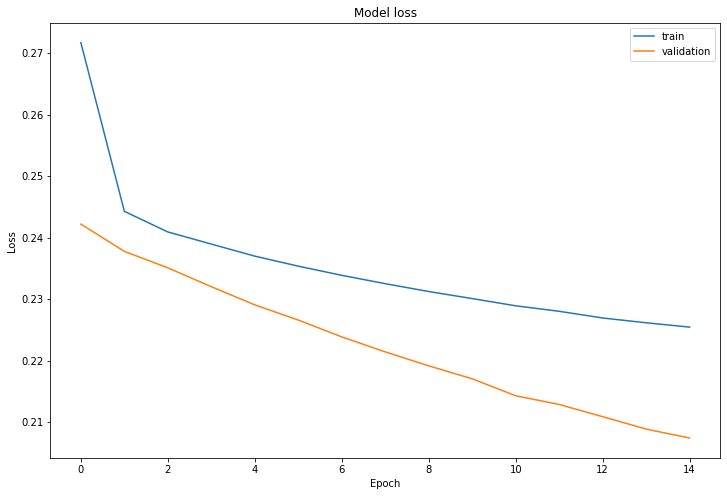

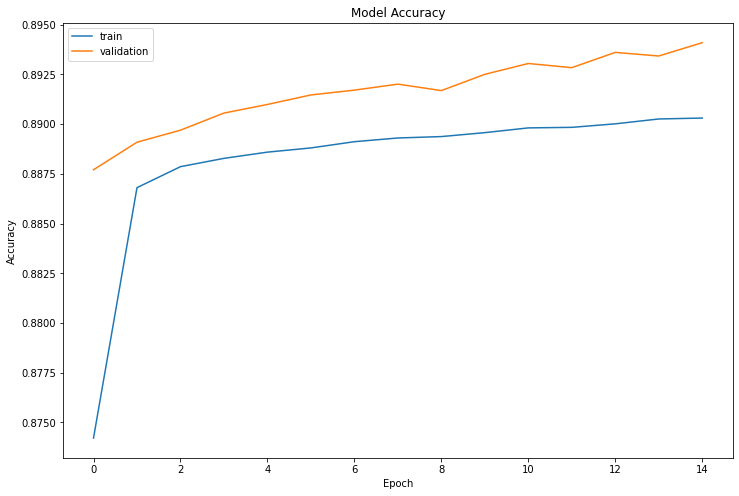

In [13]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')

# Prediciton for testset

In [14]:
dtypes_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/test_dtypes.csv')
dtypes = {k: v for (k, v) in zip(dtypes_df.column, dtypes_df.dtype)}
test_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/test.csv', dtype=dtypes)
test_df

,id,ball_pos_x,ball_pos_y,ball_pos_z,ball_vel_x,ball_vel_y,ball_vel_z,p0_pos_x,p0_pos_y,p0_pos_z,...,p5_vel_x,p5_vel_y,p5_vel_z,p5_boost,boost0_timer,boost1_timer,boost2_timer,boost3_timer,boost4_timer,boost5_timer
0,0,-56.270802,29.510000,17.348600,24.499399,-1.311400,11.006801,-35.776199,73.136803,1.2480,...,3.948400,-16.710800,0.0074,71.00000,0.000000,-3.263672,-6.132812,-6.875000,-7.015625,-3.230469
1,1,2.852800,70.195999,8.949000,-8.152200,-65.577202,18.536400,22.926001,87.543800,0.3396,...,-15.496800,-14.876600,0.0050,66.68750,0.000000,-1.615234,-5.968750,-5.503906,0.000000,-6.511719
2,2,52.366402,-98.036797,14.249001,-2.000000,-45.291401,-15.423400,51.288998,-102.055595,6.3570,...,0.905800,-27.413601,0.0042,80.37500,-0.031586,0.000000,0.000000,-3.128906,0.000000,-3.677734
3,3,36.365402,53.961403,23.161798,24.829399,-10.328600,-0.918000,16.424799,0.932800,0.3402,...,-5.053200,-15.106999,0.0052,96.06250,-6.429688,-4.089844,-7.832031,-5.761719,0.000000,-3.923828
4,4,-23.262400,-53.391003,21.209600,-1.667600,-24.778799,3.481200,-19.681801,-93.913605,4.7832,...,22.200001,24.928001,0.0042,0.00000,-9.882812,0.000000,-0.445557,-0.491455,-7.828125,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701138,701138,-4.403200,97.837196,1.947000,-17.187401,5.800400,-0.919400,36.585201,45.022999,1.5646,...,-8.230801,-10.698600,-5.4644,0.39209,0.000000,0.000000,0.000000,-3.521484,0.000000,-7.839844
701139,701139,-74.574600,-62.988998,5.712600,15.206400,-21.422400,0.637800,-81.560600,-48.214001,15.5750,...,-5.291400,-15.463000,6.6894,0.00000,-4.269531,0.000000,-7.964844,0.000000,0.000000,0.000000
701140,701140,-42.743397,-52.765602,4.220400,8.849800,32.853401,17.899399,10.959001,-39.320602,1.9344,...,16.518801,-31.844599,0.0046,100.00000,0.000000,-7.625000,-9.929688,0.000000,0.000000,0.000000
701141,701141,18.133001,-98.273796,32.703400,-5.788400,-60.722599,-5.504600,30.581999,13.514000,0.3402,...,7.217400,-26.050600,0.0054,91.75000,0.000000,-0.161743,0.000000,-2.152344,-0.377197,-2.003906


In [15]:
sample_sub_df = pd.read_csv('/kaggle/input/tabular-playground-series-oct-2022/sample_submission.csv', dtype=dtypes)
sample_sub_df

,id,team_A_scoring_within_10sec,team_B_scoring_within_10sec
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
701138,701138,0,0
701139,701139,0,0
701140,701140,0,0
701141,701141,0,0


In [16]:
X_test = test_df[features]
y_test = model.predict(X_test)

my_sub_df = pd.DataFrame({'Id': test_df.id,
                          'team_A_scoring_within_10sec': y_test[:, 0],
                          'team_B_scoring_within_10sec': y_test[:, 1]})
my_sub_df

my_sub_df.fillna(0, inplace=True)

# Saving submission

In [17]:
my_sub_df.to_csv('/kaggle/working/submission.csv', index=False)